# TME Robotique et Apprentissage: Optimisation Multi-Objectif

* Étudiant: Nom: Willaime-Angonin Prénom: Julien
* Si binome: Nom: Zuo Prénom: Nicolas

Merci à chaque membre du binome de soumettre en son nom sous moodle, cela facilite le suivi.

## Introduction

Dans ce TME, vous allez mettre en oeuvre des algorithmes évolutionnistes, notamment multi-objectifs pour faire de l'apprentissage. Pour cela, différentes fonctions vous sont fournies afin de tracer les individus générés à chaque génération ou de comparer les résultats entre eux. Vous testerez également Gym, un environnement utilisé en apprentissage par renforcement pour normaliser les expériences d'apprentissage sur des robots (virtuels).

Vous complèterez ce notebook et le soumettrez, avec les fichiers pythons que vous aurez écrits, sur Moodle. Si cela ne marche pas, vous enverrez le tout à stephane.doncieux@sorbonne-universite.fr avec les fichiers python associés. **ATTENTION** merci de mettre comme sujet: \[TME RA\] nom1 et nom2, au risque que votre mail soit perdu dans les limbes...

Pour ne pas surcharger le notebook, vous mettrez de préférence votre code dans un fichier python que vous chargerez avec un import. Le code que vous mettrez dans le notebook sera le code appelant vos fonctions et affichant le résultat. Vous prendrez soin d'assurer la lisibilité de votre notebook : afficher les courbes nécessaires pour répondre et n'oubliez pas d'enlever les affichages débogage. **La lisibilité de votre notebook influera sur l'évaluation de votre travail. **

Vous devez être en mesure de faire toutes les questions pendant la séance et de compléter votre notebook. Faire tourner ces algorithmes peut prendre du temps, en particulier si vous n'avez pas une machine très puissante, c'est la raison pour laquelle l'énoncé du code vous est fourni et c'est également pour cela qu'il y a peu de question. Utilisez donc le temps disponible pour faire un compte rendu propre dans votre notebook avec les courbes nécessaires (et pas plus) et avec une réponse rédigée (pas besoin de faire long, une ou deux phrases suffisent en général).

Vous aurez besoin de la bibliothèque DEAP (https://deap.readthedocs.io/en/master/) et d'OpenAI Gym (https://gym.openai.com/). Ces deux bibliothèques s'installent facilement avec la commande `pip`, comme indiqué dans leur documentation.


In [1]:
# Note: l'import d'un fichier ne se fait qu'une seule fois. Si vous modifiez ce fichier, 
# il vous faut redémarrer votre kernel si vous voulez prendre en compte les modifications.
# vous pouvez éviter cela de la façon suivante: 
import importlib # une seule fois

#import mon_module_python # le module doit avoir été importé une première fois
#importlib.reload(mon_module_python) # cette ligne permet de charger la dernière version

import matplotlib.pyplot as plt

# pour que les figures apparaissent directement dans le notebook
%matplotlib inline
from deap import benchmarks
import ea_simple
import numpy as np
import nsga2
import gym_cartpole
import gym_cartpole_2
from fixed_structure_nn_numpy import SimpleNeuralControllerNumpy
import gym
import warnings
warnings.filterwarnings('ignore')

## 1. Prise en main de DEAP

Dans la suite du TME, vous serez invités à utiliser DEAP, qui est une bibliothèque python open source, cf https://deap.readthedocs.io/en/master/index.html.

DEAP est une bibliothèque de prototypage rapide d'algorithmes évolutionnistes. Elle permet de travailler à plusieurs niveaux, depuis l'implémentation complète de l'algorithme à partir de briques de base jusqu'à l'utilisation boite noire d'un algorithme entièrement implémenté et en passant par des approches intermédiaires, dans lesquelles des modules sont réutilisés, par exemple pour la sélection, les mutations ou les croisements.  


Écrivez un algorithme évolutionniste de type élitiste qui génèrera lambda individus et choisira les mu meilleurs parmi les parents et les enfants. 

Vous utiliserez un croisement de type SBX (Simulated Binary Crossover) et une mutation de type polynomiale bornée (eta=15.0).

Les paramètres seront entre -5 et 5 (vous pourrez utiliser random.uniform pour l'initialisation).

Vous utiliserez les fonctions de la toolbox DEAP pour faciliter votre implémentation et vous pourrez vous inspirer des exemples fournis. Vous compléterez le fichier `ea_simple.py`. 

Vous testerez votre algorithme sur la fonction de Ackley. Elle est disponible dans DEAP et peut être appelées dans n'importe quelle dimension. Vous pourrez faire vos tests avec la dimension 10, par exemple. 


Les algorithmes évolutionnistes ont une part stochastique et ne donnent donc pas toujours le même résultat. Vous tracerez donc l'évolution de la fitness moyenne pour 10 runs indépendants. Plutôt que de tracer les 10 courbes, vous tracerez la médiane des moyennes et un intervalle représentant le 1er et le 3eme quartile. Vous procéderez pour cela de la façon suivante:


    plt.plot(gen,moyenne, label="Fitness moyenne")
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)

gen étant une liste de générations, moyenne la liste des moyennes de moyennes et fit_25 et fit_75 les 1er et 3eme quartiles. Vous pourrez les déterminer avec la fonction quantile de numpy: quantile(points, 0.25) et quantile(points, 0.75), avec points une liste qui contient les fitness des différents runs à une génération donnée (il faut donc faire une boucle et appeler ces fonctions pour chaque génération).


Tracez les courbes pour des populations de taille croissante: [5, 10, 100, 200]. Que constatez-vous ?


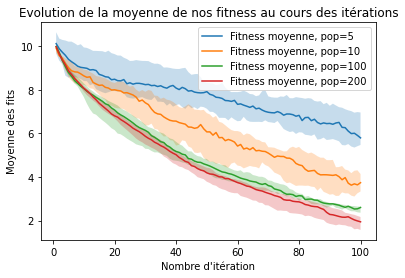

In [2]:
# à compléter pour appeler votre algorithme évolutionniste sur les différentes tailles de population et tracer l'évolution de la fitness moyenne

importlib.reload(ea_simple)
plt.figure()
plt.title('Evolution de la moyenne de nos fitness au cours des itérations')
plt.xlabel('Nombre d\'itération')
plt.ylabel('Moyenne des fits')

for p in [5, 10, 100, 200]:
    data=[ea_simple.ea_simple(p, 100, benchmarks.ackley, 10)[2]for _ in range(10)]
    #pop,hof,logbook=ea_simple.ea_simple(200, 100, benchmarks.ackley, 10)
    gen=data[0].select("gen")
    genscore=[[data[i].select("avg")[j] for i in range(10)]for j in range(100)]
    mediane=[np.median(genscore[i])for i in range(100)]
    fit_25=[np.quantile(genscore[i],0.25)for i in range(100)]
    fit_75=[np.quantile(genscore[i],0.75)for i in range(100)]
    plt.plot(gen,mediane, label="Fitness moyenne, pop="+str(p))
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)
plt.legend()

On remarque que les courbes représentant de grandes populations atteignent plus vite des valeurs plus basses et donc meilleures plus rapidement. De plus on remarque que la différence entre le premier et le troisième quartile est beaucoup plus faible dans ces courbes que dans les courbes pour les populations plus petites. Entre 100 et 200, les valeurs atteinte et la vitesse pour les atteindre semblent equivalentes mais pour 200 les fitness sont plus proche les une des autres ce qui donne un meilleur résultat global.

## 2. Apprentissage de politiques avec gym

L'objectif de cette question est de faire un premier apprentissage de politiques. Vous utiliserez pour cela un problème très simple: le pendule inversé. Il s'agit de contrôler un pendule fixé sur un chariot et capable de tourner. Le chariot peut se déplacer horizontalement. Les mouvements horizontaux du pendule font osciller le pendule et l'objectif est de le maintenir à la verticale.

OpenAI-gym est un framework permettant d'implémenter des expériences d'apprentissage par renforcement. Il propose une interface simple et unifiée et inclut de nombreux environnements utilisés pour tester des algorithmes d'apprentissage par renforcement. Vous utiliserez cet environnement et son module CartPole-v1 pour apprendre à contrôler le pendule (voir https://gym.openai.com/envs/CartPole-v1/). 

Complétez le fichier `gym_cartpole.py`. Vous tracerez dans le notebook l'évolution des fitness comme dans la question précédente. Les calculs étant plus longs, faites en fonction de vos capacités de calcul et, le cas échéant, indiquez en commentaire ce que vous vous attendriez à observer avec une puissance de calcul supérieure. Vous pourrez ne faire le tracé que pour une taille de population. 

En préparation de la question 4, sauvegardez les erreurs en x et en theta que vous avez obtenues pour chaque expérience.

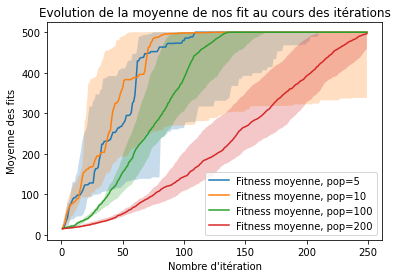

In [27]:
    importlib.reload(gym_cartpole)
    nn=SimpleNeuralControllerNumpy(4,1,2,5)
    IND_SIZE=len(nn.get_parameters())

    env = gym.make('CartPole-v1')
    plt.figure()
    plt.title('Evolution de la moyenne de nos fit au cours des itérations')
    plt.xlabel('Nombre d\'itération')
    plt.ylabel('Moyenne des fits')
    nbsteps = 250
    nbIter=10
    for p in [5, 10, 100,200]:
        data=[gym_cartpole.ea_simple(p, nbsteps, gym_cartpole.eval_nn, IND_SIZE,weights=(1.0,))[2]for _ in range(nbIter)]
        env.close()
        #pop,hof,logbook=ea_simple.ea_simple(200, 100, benchmarks.ackley, 10)
        gen=data[0].select("gen")[0:nbsteps-1]
        genscore=[[data[i].select("avg")[j] for i in range(nbIter)]for j in range(nbsteps-1)]
        moyenne=[np.median(genscore[i])for i in range(nbsteps-1)]
        fit_25=[np.quantile(genscore[i],0.25)for i in range(nbsteps-1)]
        fit_75=[np.quantile(genscore[i],0.75)for i in range(nbsteps-1)]
        plt.plot(gen,moyenne, label="Fitness moyenne, pop="+str(p))
        plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)
    plt.legend()
    plt.show()

**Remarque**: L'évaluation du pendule commence à une position aléatoire. Affichez plusieurs fois de suite la fitness obtenue en visualisant un même individu. Vous devriez observez que la fitness obtenue n'est pas toujours la même. C'est une illustration du problème de la généralisation. Pendant l'apprentissage, une politique n'a été testée que dans une condition particulière. Si vous changer un peu les conditions, vous n'avez pas de garantie sur ce qu'il va se passer... Pour limiter ce problème, une stratégie simple consiste à calculer la fitness non pas sur une seule évaluation, mais sur plusieurs et à prendre la moyenne de ces différentes évaluations. Cela devrait réduire la variabilité observée. Si la puissance de calcul dont vous disposez le permet, vous pouvez modifier ainsi votre fontion d'évaluation.

On voit que les populations plus petites convergent plus vite vers un solution mais qu'il peut rester des élément moins bon dans la population alors que les plus grandes populations convergent plus lentement vers la solution mais la population entière s'ameliore.

## 3. Implémentation de NSGA-II

Implémentez maintenant NSGA-II en vous appuyant sur les fonctions fournies dans DEAP (fichier `nsga2.py` à compléter). Vous testerez NSGA-II sur un benchmark multi-objectif fourni dans DEAP, par exemple, la fonction de Fonseca et Fleming.

Utilisez l'hypervolume pour caractériser la performance et tracer les courbes avec l'hypervolume (moyenne et 1er-3eme quartiles).

Comme précédemment, tracez l'évolution de l'hypervolume (mediane et 1er et 3eme quartiles) pour des populations de taille [5, 10, 100, 200]. 

Que remarquez-vous ?

Dans le cas de la fonction de Fonseca, vous pourrez utiliser (1,1) comme point de référence.

In [5]:
print("Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation.")
print("Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs.")
from deap.tools._hypervolume import hv
print("Hypervolume: %f"%(hv.hypervolume([np.array([1,0]), np.array([1,1]), np.array([0,1])], np.array([2,2]))))


Exemple d'utilisation du code de calcul de l'hypervolume. L'hypothèse est celle d'une minimisation.
Il faut donner un point de référence correspondant, par exemple, aux valeurs maximales pour les objectifs.
Hypervolume: 3.000000


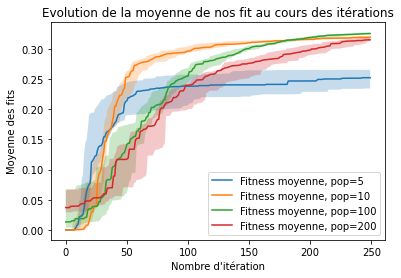

In [16]:
# à compléter pour appeler votre algorithme évolutionniste sur les différentes tailles de population et tracer l'évolution de la fitness moyenne
importlib.reload(nsga2)
IND_SIZE=5
plt.figure()
plt.title('Evolution de la moyenne de nos fit au cours des itérations')
plt.xlabel('Nombre d\'itération')
plt.ylabel('Moyenne des fits')
nbsteps = 250
nbIter=10
for p in [5, 10, 100,200]:
    data=[nsga2.my_nsga2(p, nbsteps, benchmarks.fonseca)[2]for _ in range(nbIter)]
    #pop,hof,logbook=ea_simple.ea_simple(200, 100, benchmarks.ackley, 10)
    gen=range(nbsteps)
    data=np.array(data)
    mediane=[np.median(data[:,i])for i in range(nbsteps)]
    fit_25=[np.quantile(data[:,i],0.25)for i in range(nbsteps)]
    fit_75=[np.quantile(data[:,i],0.75)for i in range(nbsteps)]
    plt.plot(gen,mediane, label="Fitness moyenne, pop="+str(p))
    plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)
plt.legend()



Avec NSGA-II, les populations les plus petites convergent plus vite vers une valeur mais cette valeur est moins bonne que pour les populations les plus grandes qui mettent beaucoup plus de temps à converger vers une résultat meilleur.

## 4. Apprentissage direct dans l'espace des politiques, version multi-objectif

Le pendule inversé est en fait un problème multi-objectif dans lequel le pendule doit être maintenu à la verticale, le chariot étant centré dans une zone donnée. 

Compléter le fichier `gym_cartpole_2.py` pour minimiser l'erreur en x et en theta avec NSGA-2. Vous pourrez tracer l'évolution de l'hypervolume ou modifier le code de NSGA2 pour tracer l'évolution de l'erreur en x et de l'erreur en theta. 

Vous pourrez également tracer les différents points explorés dans l'espace objectif au fil des générations pour matérialiser le progrès vers le front de Pareto. Vous pourrez ajouter sur cette courbe les points obtenus par les expériences en mono-objectif.


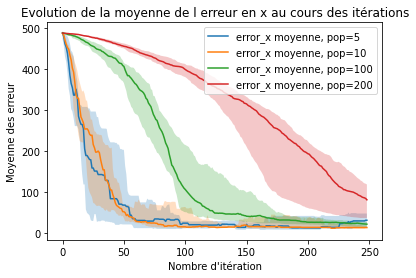

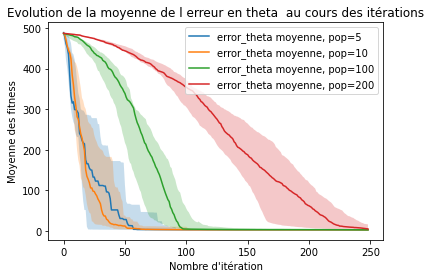

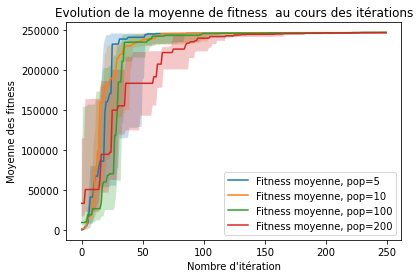

In [17]:
    importlib.reload(gym_cartpole_2)
    nn=SimpleNeuralControllerNumpy(4,1,2,5)
    IND_SIZE=len(nn.get_parameters())

    env = gym.make('CartPole-v1')
    plt.figure()
    plt.title('Evolution de la moyenne de l erreur en x au cours des itérations')
    plt.xlabel('Nombre d\'itération')
    plt.ylabel('Moyenne des erreur')
    nbsteps = 250
    nbIter=10
    hv=[]
    error_theta=[]
    for p in [5, 10,100,200]:
        data=[gym_cartpole_2.my_nsga2(p, nbsteps, gym_cartpole_2.eval_nn,IND_SIZE=IND_SIZE,ref_point=(500,500))[2:4]for _ in range(nbIter)]
        env.close()
        hv.append(np.array([data[i][0] for i in range(nbIter)]))
        #pop,hof,logbook=ea_simple.ea_simple(200, 100, benchmarks.ackley, 10)
        error_x=np.array([[data[i][1][j][0] for j in range(nbsteps-1)]for i in range(nbIter)])
        error_theta.append(np.array([[data[i][1][j][1] for j in range(nbsteps-1)]for i in range(nbIter)]))
        gen=range(nbsteps-1)
        data=np.array(data)
        mediane_x=[np.median(error_x[:,i])for i in range(nbsteps-1)]
        fit_25_x=[np.quantile(error_x[:,i],0.25)for i in range(nbsteps-1)]
        fit_75_x=[np.quantile(error_x[:,i],0.75)for i in range(nbsteps-1)]
        plt.plot(gen,mediane_x, label="error_x moyenne, pop="+str(p))
        plt.fill_between(gen, fit_25_x, fit_75_x, alpha=0.25, linewidth=0)
    plt.legend()
    plt.figure()
    plt.title('Evolution de la moyenne de l erreur en theta  au cours des itérations')
    plt.xlabel('Nombre d\'itération')
    plt.ylabel('Moyenne des fitness')
    
    for i in range(4):
        p=[5, 10, 100,200]
        data=error_theta[i]
        gen=range(nbsteps-1)
        data=np.array(data)
        mediane_theta=[np.median(data[:,i])for i in range(nbsteps-1)]
        fit_25_theta=[np.quantile(data[:,i],0.25)for i in range(nbsteps-1)]
        fit_75_theta=[np.quantile(data[:,i],0.75)for i in range(nbsteps-1)]
        plt.plot(gen,mediane_theta, label="error_theta moyenne, pop="+str(p[i]))
        plt.fill_between(gen, fit_25_theta, fit_75_theta, alpha=0.25, linewidth=0)
    plt.legend()
    plt.figure()
    plt.title('Evolution de la moyenne de fitness  au cours des itérations')
    plt.xlabel('Nombre d\'itération')
    plt.ylabel('Moyenne des fitness')
    
    for i in range(4) :
        p=[5, 10, 100,200]
        data=hv[i]
        #pop,hof,logbook=ea_simple.ea_simple(200, 100, benchmarks.ackley, 10)
        gen=range(nbsteps)
        data=np.array(data)
        mediane=[np.median(data[:,i])for i in range(nbsteps)]
        fit_25=[np.quantile(data[:,i],0.25)for i in range(nbsteps)]
        fit_75=[np.quantile(data[:,i],0.75)for i in range(nbsteps)]
        plt.plot(gen,mediane, label="Fitness moyenne, pop="+str(p[i]))
        plt.fill_between(gen, fit_25, fit_75, alpha=0.25, linewidth=0)
    plt.legend()

La troisième courbe représente la valeur obtenue à partir de l'hypervolume.

On peut voir sur les courbe que les petites population la convergence vers une bonne solution plutot vite avec une différence entre les 1er et 3ème quartile plutot petite.On voit que pour ce problème, une petite population peut être préférable puisque l'objectif est atteignable avec un petit nombre d'individus et en beaucoup moins d'iterations qu'avec de grandes populations. On remarque aussi que NSGA-II donne de meilleurs résultats pour les plus petites populations que le premier algorithme qu'on a vu.